In [1]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.sms_exact import SMSEMOA_EXACT
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
from pymoo.indicators.igd import IGD
from pymoo.util.normalization import normalize
import numpy as np


algos = ['wfg1','wfg2','dtlz1','dtlz2','dtlz4']
no_obs = [10,10,4,4,4]
for i,algo in enumerate(algos):
    for j in range(10):
        n_obj = 2
        problem = get_problem(algo,no_obs[i],n_obj=n_obj)
        pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=136   ).do())
        algorithm = SMSEMOA_MODA()
        start = time.time()
        res_moda = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moda_time = time.time() - start
        algorithm = SMSEMOA()
        start = time.time()
        res_approx_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_time = time.time() - start
        algorithm = SMSEMOA_EXACT()
        start = time.time()
        res_exact_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_exact_time = time.time() - start
        
        
        F_all = np.vstack([
            res_moda.F,
            res_approx_moo.F,
            res_exact_moo.F,
            pf
        ])

        F_norm = normalize(F_all)

        n1 = len(res_moda.F)
        n2 = len(res_approx_moo.F)
        n3 = len(res_exact_moo.F)

        F_moda_n = F_norm[:n1]
        F_approx_n = F_norm[n1:n1+n2]
        F_exact_n = F_norm[n1+n2:n1+n2+n3]
        pf_n = F_norm[n1+n2+n3:]

        igd = IGD(pf_n)
        igd_moda = igd(F_moda_n)
        igd_approx = igd(F_approx_n)
        igd_exact = igd(F_exact_n)
        print(f'{moo_exact_time}\t{igd_exact}\t{moo_time}\t{igd_approx}\t{moda_time}\t{igd_moda}\r\n',end = '')

(4.6023906463688036e-08, 0.0, 11, -1, 15214)
(4.6023906463688036e-08, 0.0, 11, -1, 14211)
(4.6023906463688036e-08, 0.0, 11, -1, 14327)
(4.6023906463688036e-08, 0.0, 11, -1, 13682)
(4.6023906463688036e-08, 0.0, 11, -1, 13662)
(1.6135932412453258e-07, 0.0, 10, -1, 14107)
(2.0971752690002177e-07, 0.0, 1, -1, 13830)
(2.0971752690002177e-07, 0.0, 1, -1, 14474)
(2.0971752690002177e-07, 0.0, 1, -1, 13905)
(7.164941052906215e-06, 0.0, 4, -1, 14200)
(7.164941052906215e-06, 0.0, 4, -1, 14277)
(1.666878415562678e-05, 0.0, 1, -1, 14238)
(2.8802375595660124e-07, 0.0, 6, -1, 14764)
(2.8802375595660124e-07, 0.0, 6, -1, 14897)
(2.8802375595660124e-07, 0.0, 6, -1, 14184)
(1.4321019037311089e-08, 0.0, 20, -1, 15188)
(1.22413652547948e-07, 0.0, 2, -1, 14762)
(1.22413652547948e-07, 0.0, 2, -1, 15082)
(1.5093054628323443e-07, 0.0, 13, -1, 14624)
(1.5093054628323443e-07, 0.0, 13, -1, 14265)
(1.5093054628323443e-07, 0.0, 13, -1, 14176)
(1.5093054628323443e-07, 0.0, 13, -1, 14328)
(1.5093054628323443e-07, 0.0

KeyboardInterrupt: 

(4.602563308253593e-08, 0.0, 11, -1, 8262)

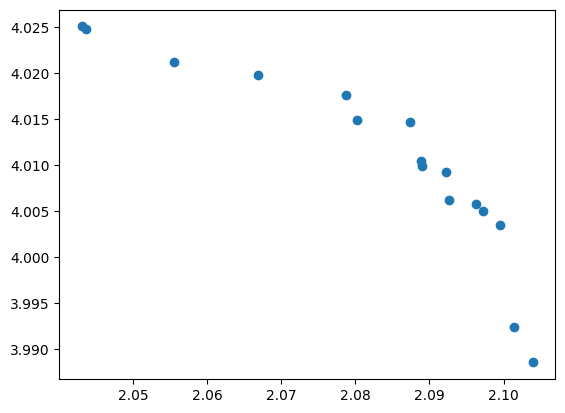

In [1]:
import moda
import matplotlib.pyplot as plt
import numpy as np
data = np.array([[2.93309015, 0.98014866],
 [2.91972875, 0.98511465],
 [2.92119195, 0.9823885 ],
 [2.90044519, 0.99650662],
 [2.8986138 , 1.00758202],
 [2.89605547, 1.01149431],
 [2.9036515 , 0.99421595],
 [2.91266866, 0.98525798],
 [2.90771252, 0.99072505],
 [2.91114494, 0.98950449],
 [2.90732425, 0.99380037],
 [2.91106863, 0.99012191],
 [2.90274593, 0.9949471 ],
 [2.9568786 , 0.97489954],
 [2.95633571, 0.97513668],
 [2.94451091, 0.97875965]])

data = -data
data = data + 5

plt.scatter(data[:,0], data[:,1])
ds = moda.DataSet(data)


solver = moda.QEHCSolver()
params = moda.QEHCParameters()

r = solver.Solve(ds, params)
r
